In [113]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor


data = pd.read_csv('USA_Housing.csv') 
data.head()

print('\nShape')
data.shape

print('\nInfo')
data.info()

print('\nNullity_Check')
Null_Check=data.isnull().sum()
print(Null_Check)



Shape

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB

Nullity_Check
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In this dataset didn't have any null values so, it does not need to data cleaning and filling

In [115]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [116]:
data.describe()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<Axes: xlabel='Price', ylabel='Count'>

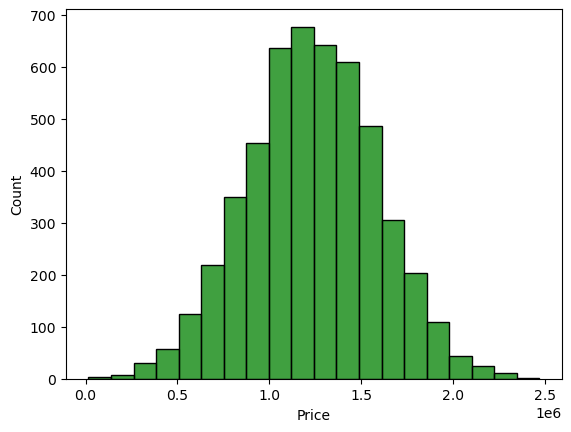

In [117]:
sns.histplot(data, x='Price', bins=20, color='g')

array([[<Axes: title={'center': 'Avg. Area Income'}>,
        <Axes: title={'center': 'Avg. Area House Age'}>],
       [<Axes: title={'center': 'Avg. Area Number of Rooms'}>,
        <Axes: title={'center': 'Avg. Area Number of Bedrooms'}>],
       [<Axes: title={'center': 'Area Population'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

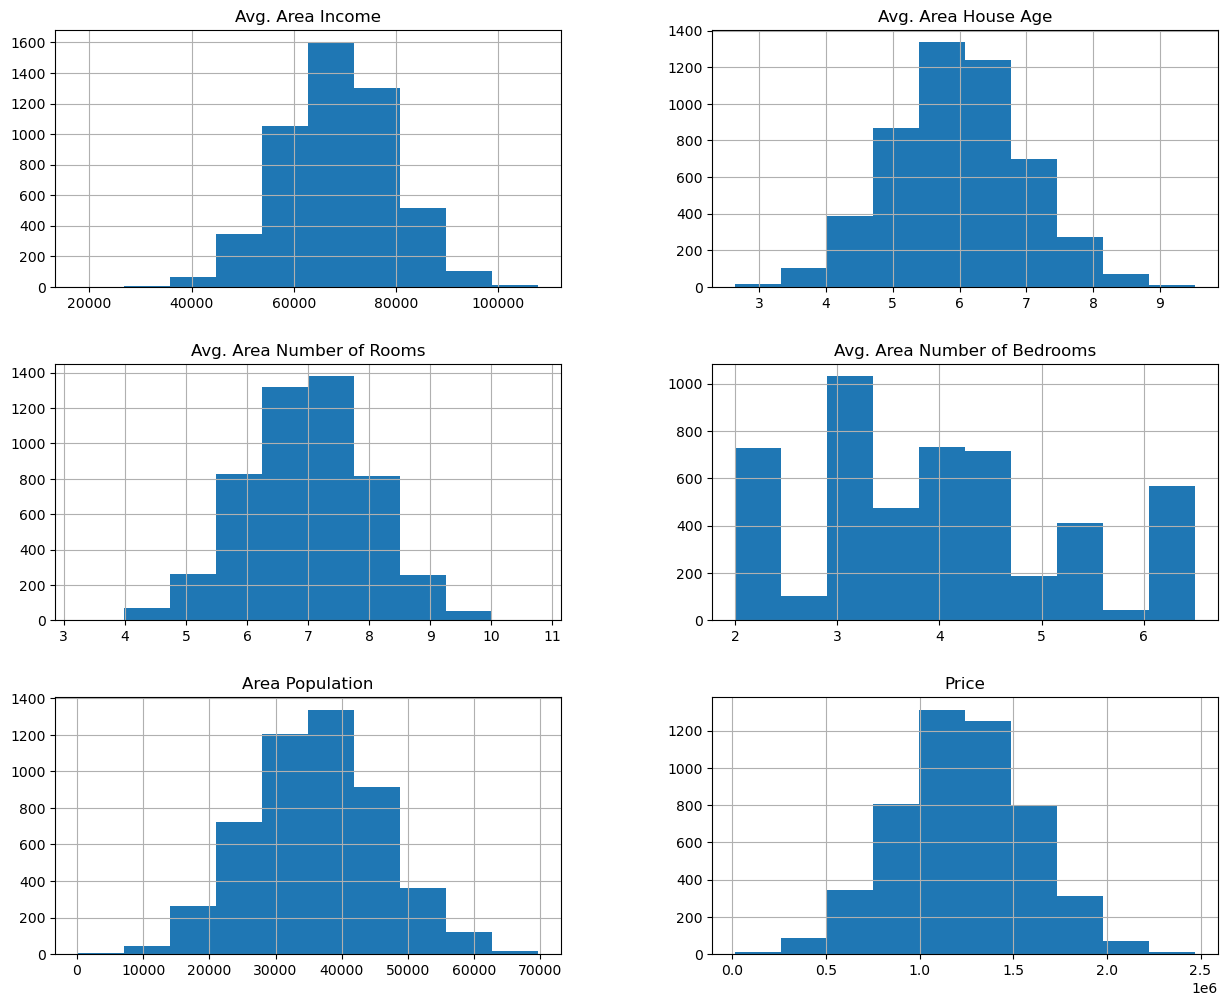

In [118]:
data.hist(figsize=(15,12))

In [119]:
data.corr(numeric_only=True)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


we does not require object types address is not nesscary for our analysis so we remove the address column.

<Axes: >

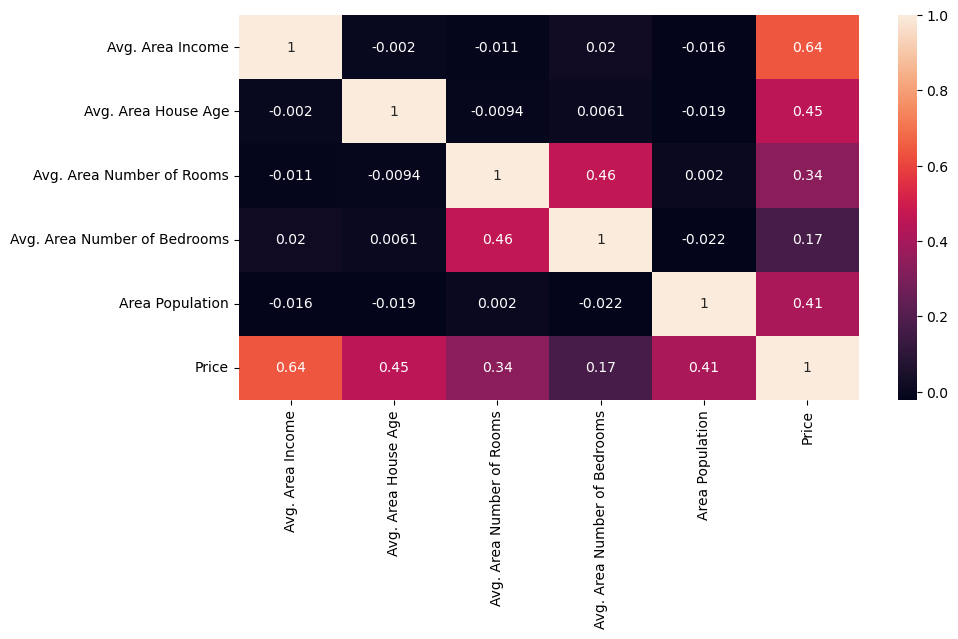

In [120]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(numeric_only = True), annot=True)


In [121]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
'Avg. Area Number of Bedrooms', 'Area Population']]
Y = data['Price']

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=101)


In [123]:
Y_train.head()

3413    1.305210e+06
1610    1.400961e+06
3459    1.048640e+06
4293    1.231157e+06
1039    1.391233e+06
Name: Price, dtype: float64

In [124]:
Y_train.shape

(4000,)

In [125]:
sc = StandardScaler()
X_train_scaling = sc.fit_transform(X_train)
X_test_scaling = sc.fit_transform(X_test)

In [126]:
lr=LinearRegression()
lr.fit(X_train_scaling, Y_train)

LinearRegression()

In [127]:
Prediction_using_lr = lr.predict(X_test_scaling)

Text(0.5, 1.0, 'Actual vs Predicted')

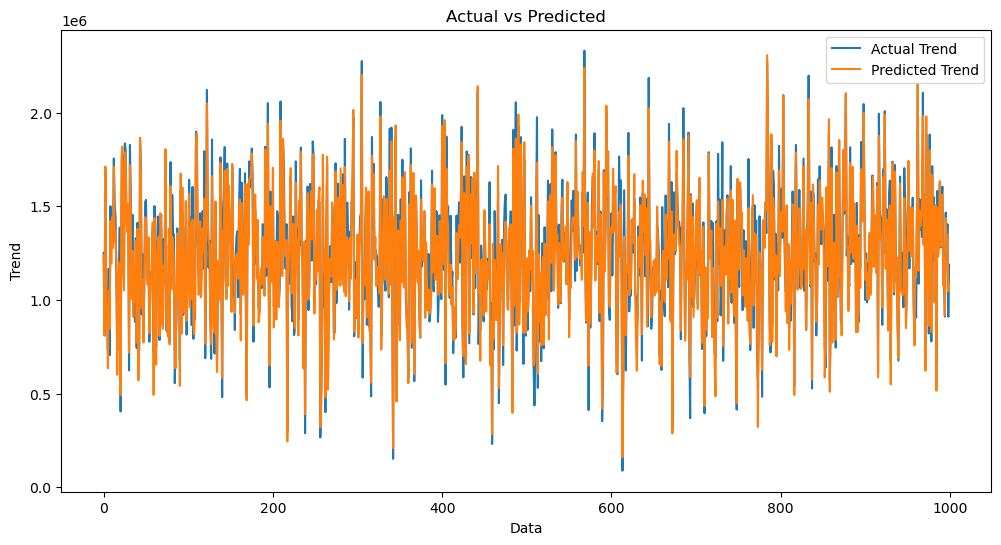

In [128]:
    plt.figure(figsize=(12,6))
    plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
    plt.plot(np.arange(len(Y_test)), Prediction_using_lr, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs Predicted')

<Axes: xlabel='Price', ylabel='Count'>

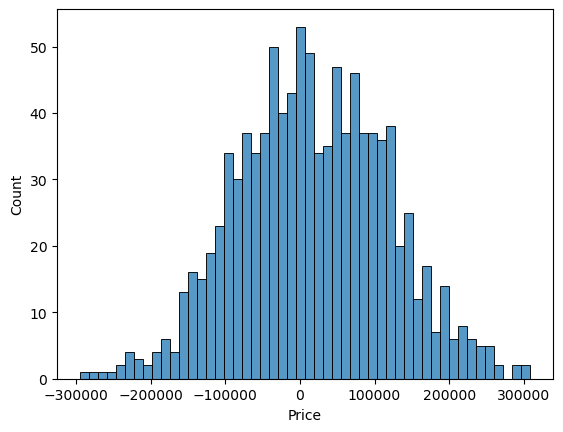

In [129]:
sns.histplot((Y_test-Prediction_using_lr), bins=50)

In [130]:
print(r2_score(Y_test, Prediction_using_lr))
print(mean_absolute_error(Y_test, Prediction_using_lr))
print(mean_squared_error(Y_test, Prediction_using_lr))

0.918292817939292
82295.4977923175
10469084772.97595


In [131]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train_scaling, Y_train)

RandomForestRegressor(n_estimators=50)

In [132]:
Prediction_using_rf = rf.predict(X_test_scaling)

Text(0.5, 1.0, 'Actual vs Predicted')

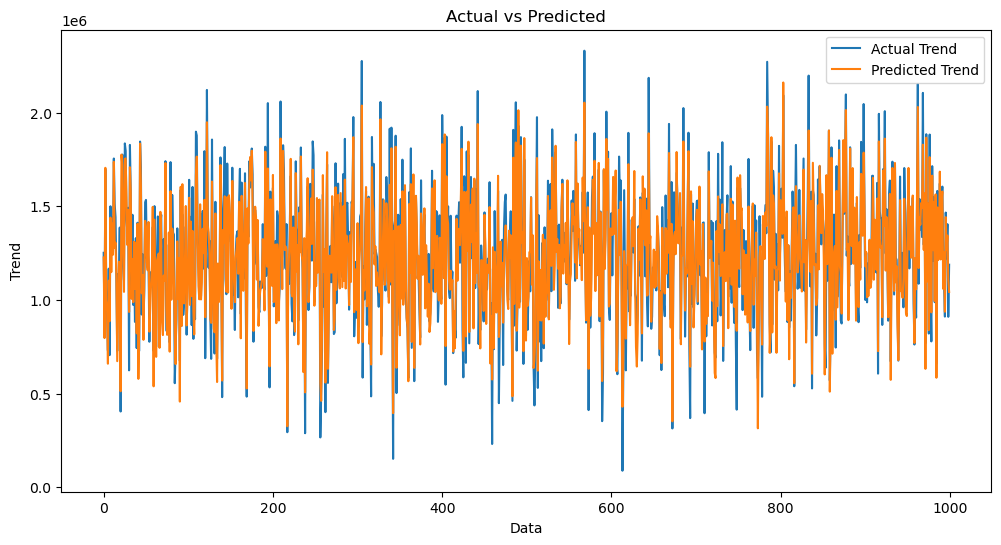

In [133]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(Y_test)), Y_test, label='Actual Trend')
plt.plot(np.arange(len(Y_test)), Prediction_using_rf, label='Predicted Trend')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual vs Predicted')

<Axes: xlabel='Price', ylabel='Count'>

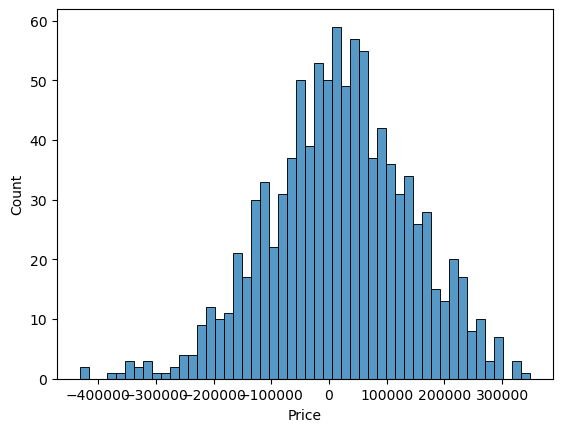

In [134]:
sns.histplot((Y_test-Prediction_using_rf), bins=50)

In [135]:
print(r2_score(Y_test, Prediction_using_rf))
print(mean_absolute_error(Y_test, Prediction_using_rf))
print(mean_squared_error(Y_test, Prediction_using_rf))

0.8773049842598689
99247.01817198505
15720827577.319576
